In [18]:
#importing libraries  
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn_extra.cluster import KMedoids
from src.utils import center_based_clustering_algorithms as CBC

In [12]:
# Reading data as dataframe
original = pd.read_csv('../data/processed/data_scaled_minmax.csv')
original

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,made_trips,age,...,work_cms_zone_Outer Brooklyn,work_cms_zone_Outer Queens,work_cms_zone_Southern Bronx,work_cms_zone_Staten Island,work_cms_zone_Upper Manhattan,first_travel_date_day,first_travel_date_month,last_travel_date_day,last_travel_date_month,hierarchical_cluster
0,0.129213,0.010753,0.052632,0.305556,0.0,0.000000,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.766667,1.0,0.966667,1.0,2
1,0.084270,0.021505,0.017544,0.000000,0.0,0.000000,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.933333,0.0,0.100000,1.0,4
2,0.168539,0.236559,0.157895,0.000000,0.0,0.000000,1.0,1.0,1.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.166667,1.0,0.366667,1.0,3
3,0.269663,0.247312,0.228070,0.000000,0.0,0.000000,1.0,0.4,1.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.700000,1.0,3
4,0.252809,0.139785,0.105263,0.333333,0.0,0.111111,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.233333,1.0,0.433333,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,0.011236,0.000000,0.035088,0.000000,0.0,0.000000,0.0,0.2,1.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.400000,1.0,0.400000,1.0,4
3342,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,0.0,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.966667,0.0,0.966667,0.0,4
3343,0.016854,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,1.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.766667,0.0,0.766667,0.0,3
3344,0.022472,0.000000,0.035088,0.000000,0.0,0.055556,0.5,0.0,1.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.466667,1.0,0.466667,1.0,4


In [13]:
data = original.copy()
data.drop(columns='hierarchical_cluster', inplace=True)

In [14]:
data.shape

(3346, 231)

## Dimentioality Reduction
- Using PCA to reduce the original number of feature to 2. 

In [16]:
#Initiate a pca model to reduce the dimentions of the data 
pca_model = PCA(n_components=2, random_state=0) 

#reduce the dimentions of the data 
pca_data = pca_model.fit_transform(data)

# define "two_components_df" that include the valuse for the components after reducing the dimentions of the data
two_components_df = pd.DataFrame(
    pca_data,
    columns=["component_1", "component_2"],
    )

# K-Means  <a class="anchor" id="K_Means"></a>

##### Using the elbow method to find the best value for K, trying K-means++ using the original dataset

Note: Distortion is the sum of squared error

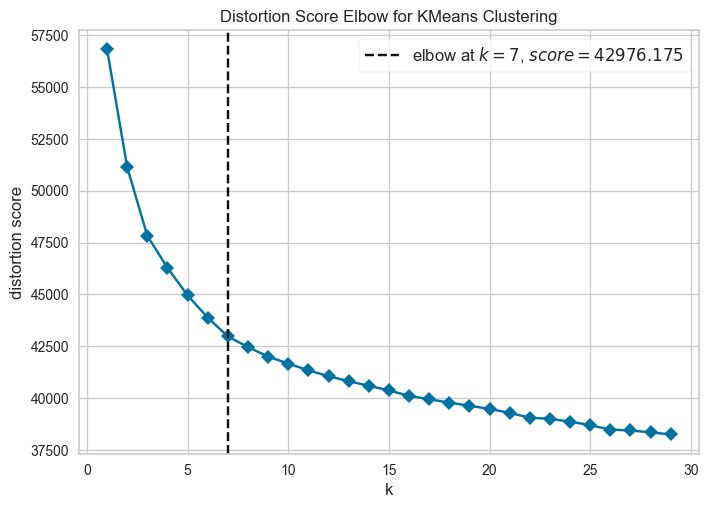

In [19]:
# define a kmeans object 
K_means_model = KMeans(n_init = 150)

# define "potential_k_list" that contains k values we will go over while calculating the erro
potential_k_list = list(range(1, 30))

#plot the sse for each k 
CBC.plot_elbow(data, K_means_model, potential_k_list)

> ##### `From the plot above we can see the distortion score(SSE) for k values between 1 - 29. After k = 7 the distorion score start decreasing in a linear fashion which means that the best number of clusters could be between 5 - 7.`

### Plot the silhouette plot for K-means++ trying different values for k 

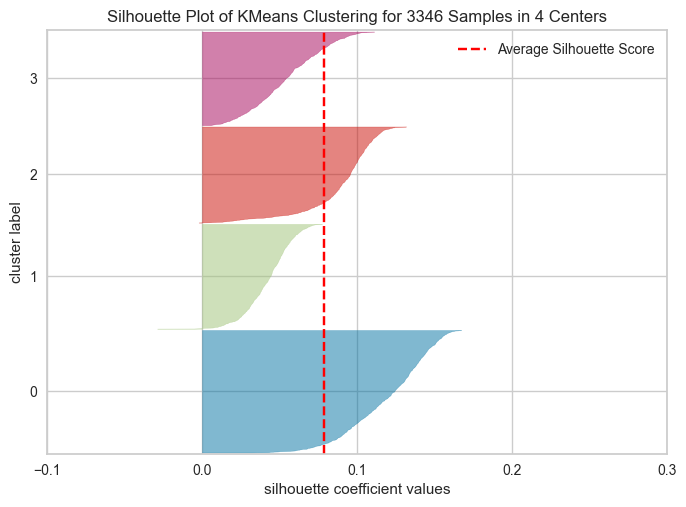

In [8]:
CBC.plot_silhouette(4, KMeans, data) 

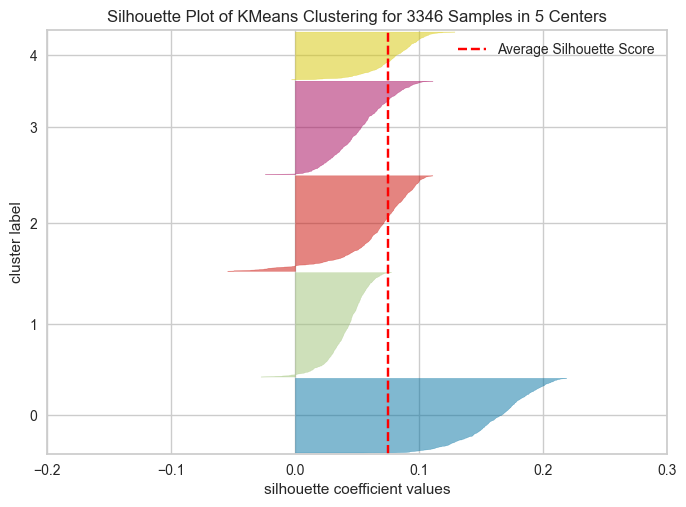

In [9]:
CBC.plot_silhouette(5, KMeans, data)

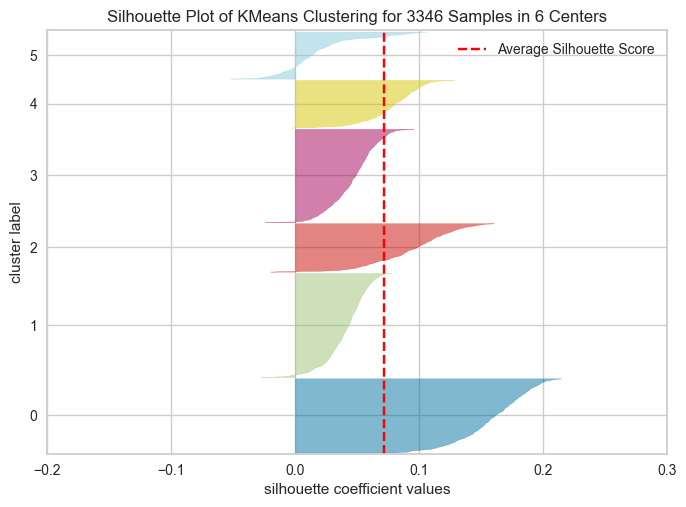

In [10]:
CBC.plot_silhouette(6, KMeans, data)

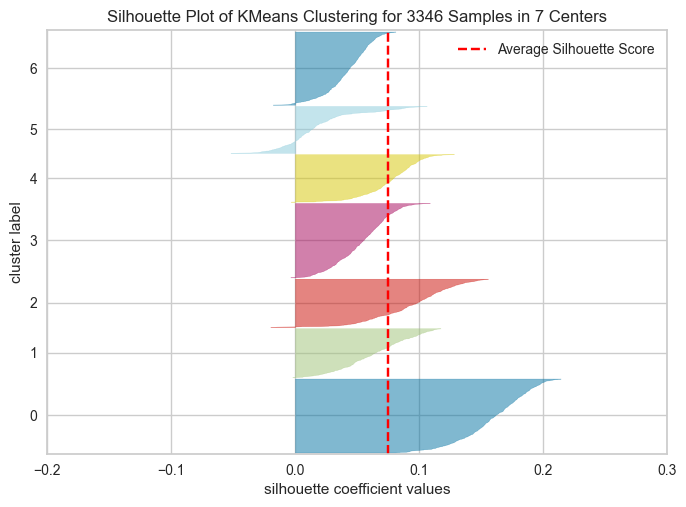

In [11]:
CBC.plot_silhouette(7, KMeans, data)

In [20]:
## define "potential_k_range" a list contains k valuse we want go over to calculate 
#the average silhouette score
potential_k_range = list(range(2, 30))

#define "silhouette_score_for_ks" a list contains the silhouette score 
#for k values between 2 - 29
silhouette_score_for_ks = CBC.calculate_silhouette_score(KMeans, potential_k_range, data)

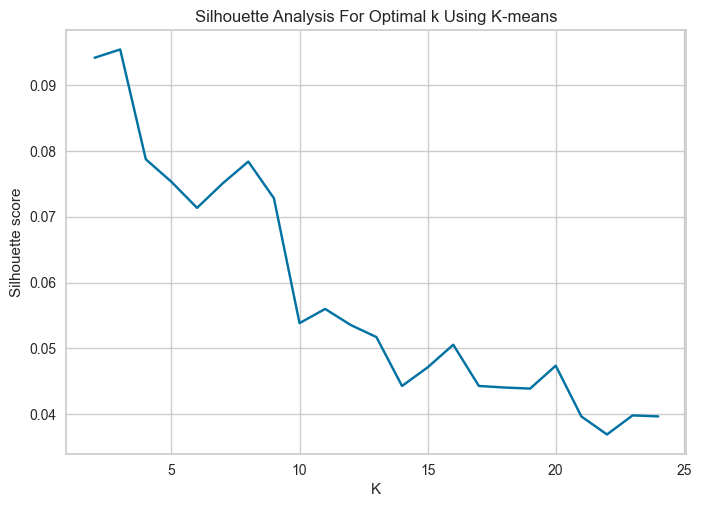

In [12]:
CBC.plot_silhouette_score(potential_k_range, silhouette_score_for_ks, "K-means")

In [57]:
#go over the silhouette average for k values between 4 - 7
for index, score in enumerate(silhouette_score_for_ks[2:6]) :
    print(f"The average silhouette_score is: {score} for K = {index + 4}.")

The average silhouette_score is: 0.07873369480494771 for K = 4.
The average silhouette_score is: 0.0753088086906613 for K = 5.
The average silhouette_score is: 0.07135081039989177 for K = 6.
The average silhouette_score is: 0.07507053884363876 for K = 7.


* K = 4 has the lowest number of points that are overlapped to different clusters, it's average silhouete score is the highest one comparing with 5, 6, 7 as values of k.

* When K = 7, all clusters are above the silhouette score, but its average silhouete score is less than the score of K = 4. Comparing to the plot when k = 4 it has more points that are overlapped to different clusters.


In [21]:
#Define data_labels, a dataframe that will contain labels for each sample after
#applying different clustering algorithsm
data_labels = pd.DataFrame()

#### Visualizing the cluster in 2D 

> - `I will choose 7 as a value for k, according to the elbow method.` 

c:\Users\DELL\OneDrive\سطح المكتب\Github Cluster Repo\Clustering-Analysis\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


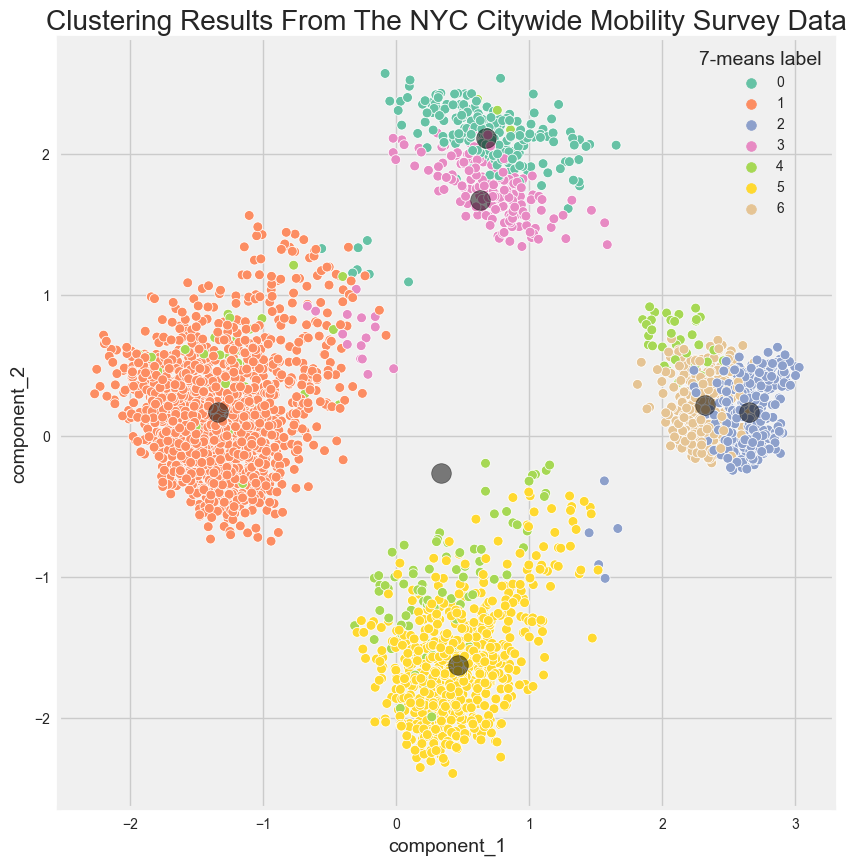

In [23]:
# #get centroids for the cluster and labels for each datapoint
data_labels['7-means label'], seven_means_centers = CBC.train_model(KMeans, 7, data)

#reduce centers dimentions so we can plot them
embedded_centers_7_means = pca_model.transform(seven_means_centers)

#Plot
CBC.plot_2d_scatter(two_components_df, "component_1", "component_2", data_labels['7-means label'], embedded_centers_7_means)

> Accordint to the 2D visualization, we can conclude that 7-means++ didn't perfom well due to the overlapping in the clusters.

# K-Means++ using data after the dimensioality reduction

#### Using the elbow method to find the best value for K, trying K-means++ using data after the dimensioality reduction

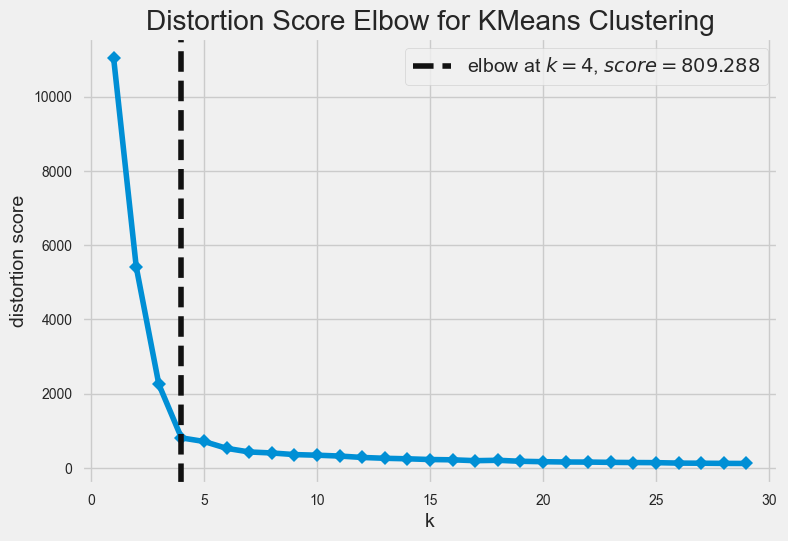

In [24]:
# define a kmeans object 
K_means_model_ = KMeans(n_init = "auto") 

#plot the sse for each k
CBC.plot_elbow(two_components_df, K_means_model_, potential_k_list) 

##### `From the plot above, a value of 4 could be the best value for k`

### Plot the silhouette plot for K-means++ trying different values for k using the data after reduce its dimentions

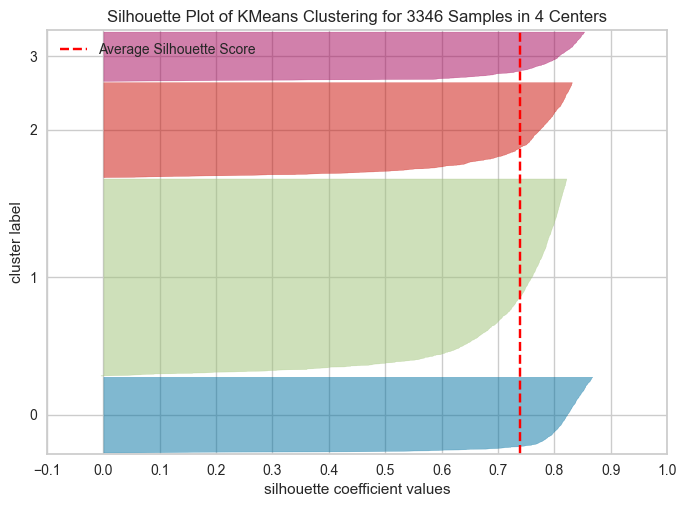

In [10]:
CBC.plot_silhouette(4, KMeans, two_components_df)

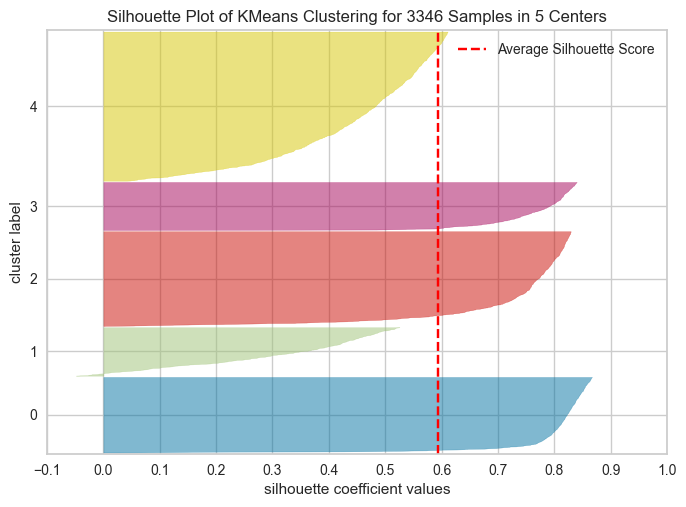

In [11]:
CBC.plot_silhouette(5, KMeans, two_components_df)

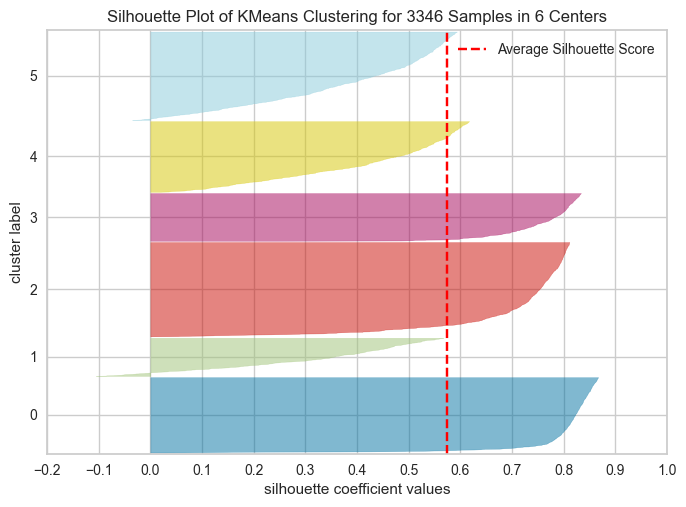

In [12]:
CBC.plot_silhouette(6, KMeans, two_components_df)

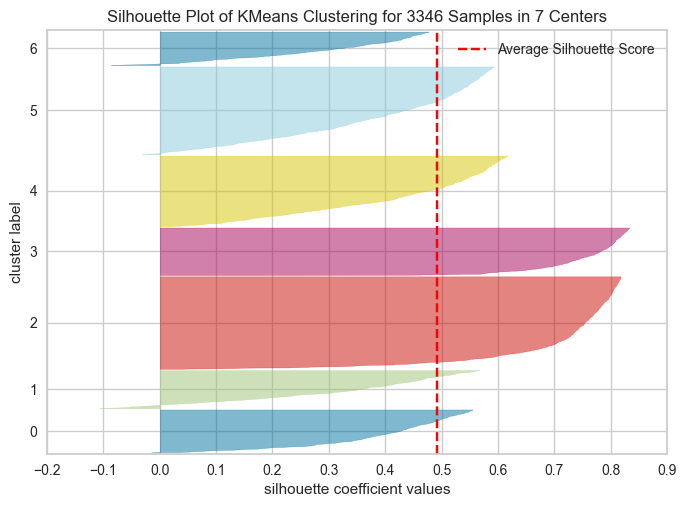

In [13]:
CBC.plot_silhouette(7, KMeans, two_components_df)

In [25]:
## define "potential_k_range" a list contains k valuse we want go over to calculate 
#the average silhouette score
k_range = list(range(4, 8))

#define "silhouette_score_for_ks" a list contains the silhouette score 
#for k values between 4 - 7
silhouette_score_for_ks_ = CBC.calculate_silhouette_score(KMeans, k_range, two_components_df)

#go over the silhouette average for k values between 4 - 7
for index, score in enumerate(silhouette_score_for_ks_) :
    print(f"The average silhouette_score is: {score} for K = {index + 4}.")

The average silhouette_score is: 0.7394519567290322 for K = 4.
The average silhouette_score is: 0.5937615805401151 for K = 5.
The average silhouette_score is: 0.5747330739848069 for K = 6.
The average silhouette_score is: 0.49106618866050733 for K = 7.


* When k = 4 all clusters are above the average silhouette score and there is no misclassified point(points in the negative side), it has the highest average silhouette score, so it could be the best value for k.

> `According to the elbow method I will choose 4 as the best value for k.`

#### Visualizing cluster in 2D 

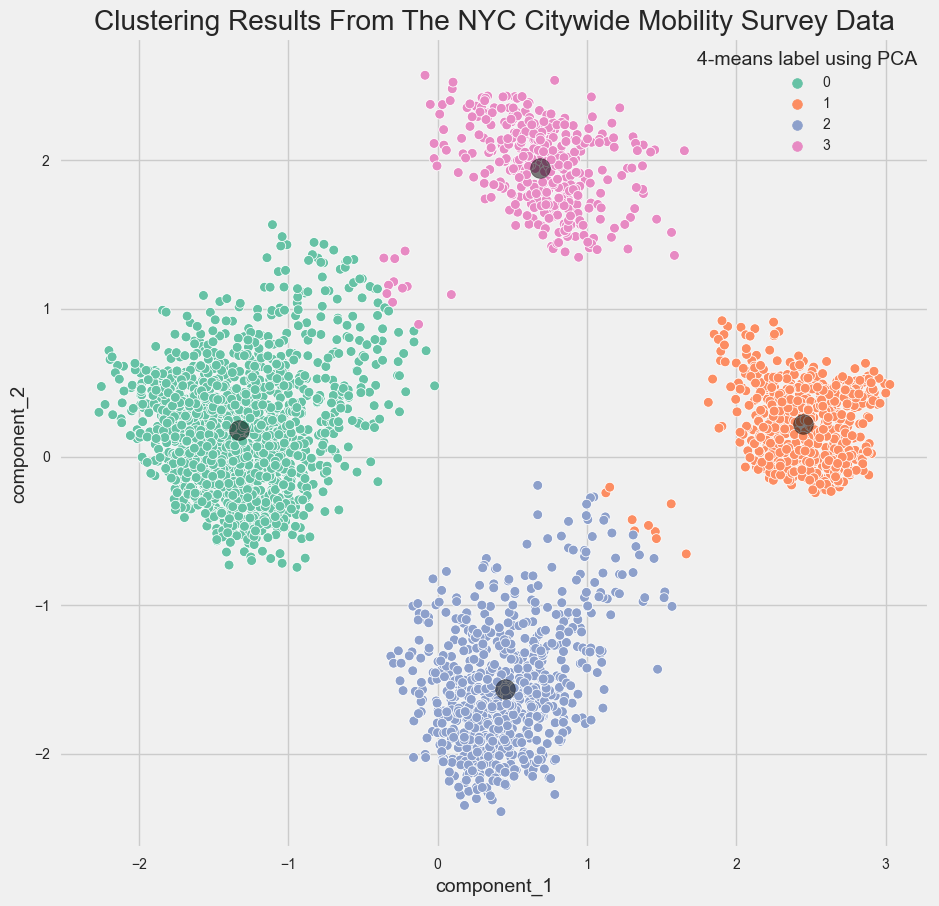

In [26]:
# #get centroids for each cluster and labels for each datapoint
data_labels['4-means label using PCA'], four_means_centers = CBC.train_model(KMeans, 4, two_components_df)
 
#Plot
CBC.plot_2d_scatter(two_components_df, "component_1", "component_2", data_labels['4-means label using PCA'], four_means_centers)

# K-Medoids  


##### Using the elbow method to find the best value for K, trying K-medoids 

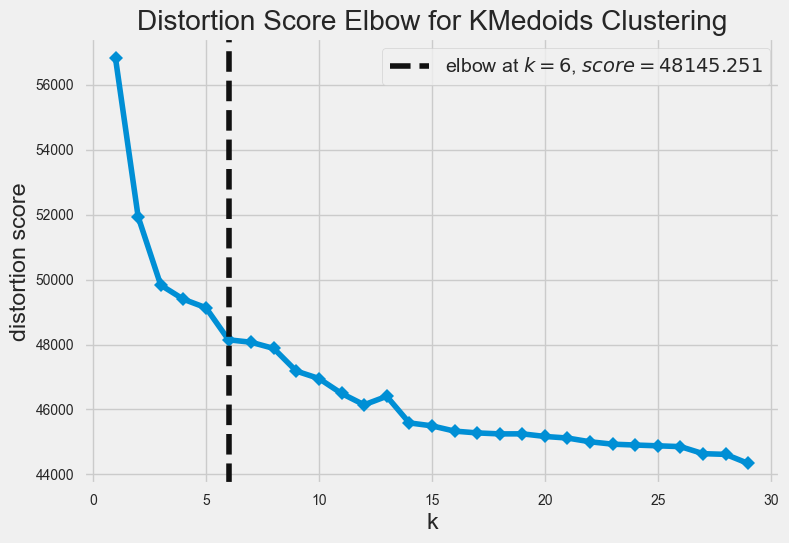

In [63]:
# Instantiate KMedoids the clustering model 
K_medoids_model_ = KMedoids() 

#plot the sse for each k  
CBC.plot_elbow(data, K_medoids_model_, potential_k_list)

> `Value of 6 could be the best value for k`

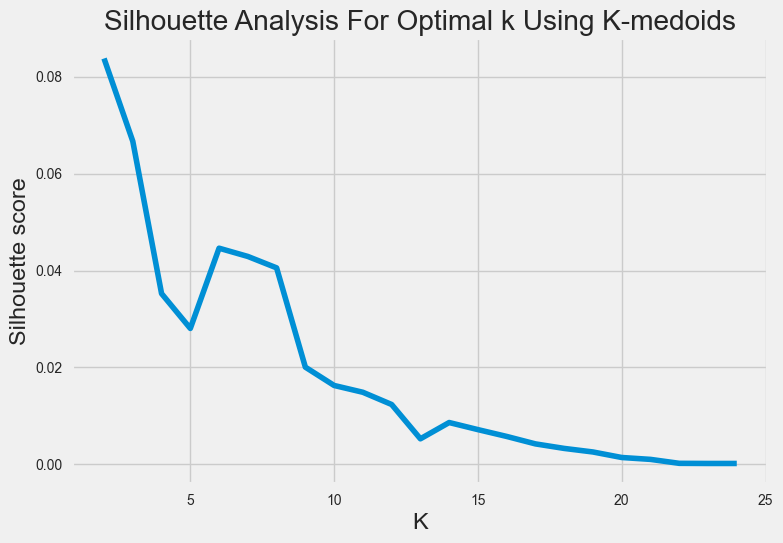

In [23]:
#define "silhouette_score_for_medoids_ks" a list contains the silhouette score 
#for k values between 2 - 29    
silhouette_score_for_medoids_ks = CBC.calculate_silhouette_score(KMedoids, potential_k_range, data)

CBC.plot_silhouette_score(potential_k_range, silhouette_score_for_medoids_ks, "K-medoids")

In [65]:
#go over the silhouette average for k values between 4 - 7 and print it
for index, score in enumerate(silhouette_score_for_medoids_ks[2:6]) :
    print(f"The average silhouette_score is: {score} for K = {index + 4}.")

The average silhouette_score is: 0.03523593034427679 for K = 4.
The average silhouette_score is: 0.02804114464023852 for K = 5.
The average silhouette_score is: 0.04460448856441024 for K = 6.
The average silhouette_score is: 0.0429023684459916 for K = 7.


- Comparing results from the two evaluation methods(elbow and silhouette) after applying K-Means++ and K-Medoids, we can conclude that K-Means++ performed better than K-Medoids where the K-Means++ sse is lower than K-Medoids sse, and values of K-Medoids silhouette score is lower than K-Means++ values.


c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


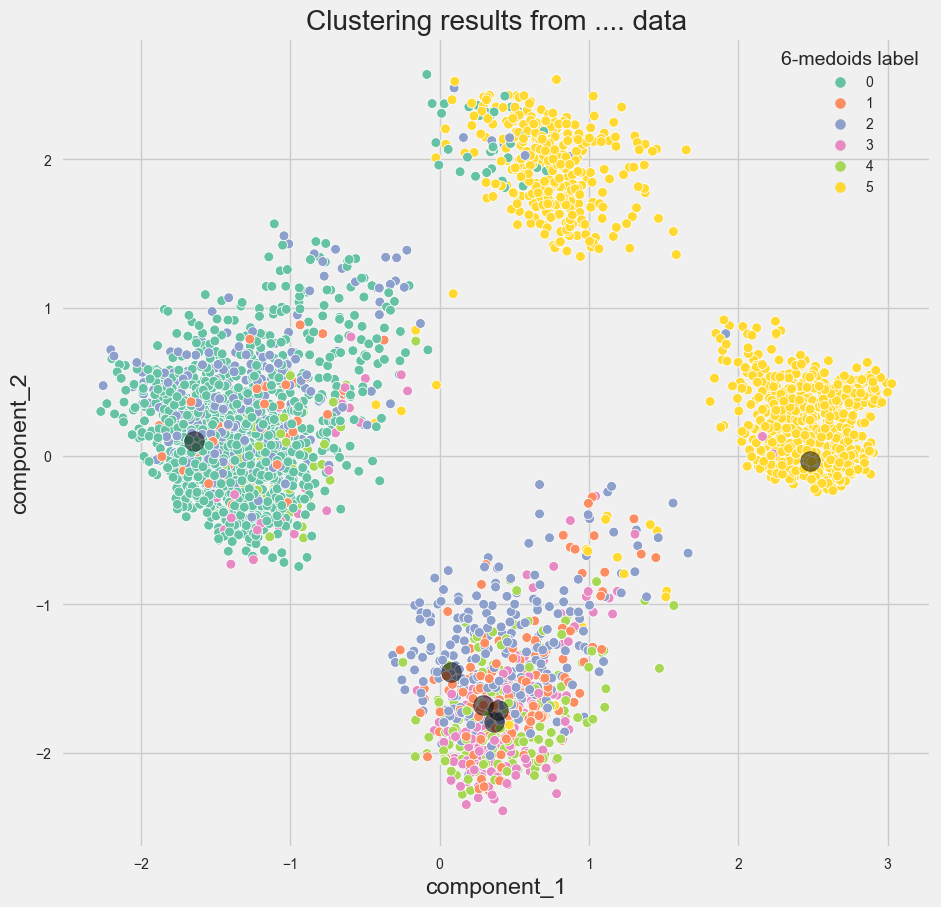

In [66]:
#get centroids for each cluster and labels for each datapoint
data_labels['6-medoids label'], six_medoids_centers = CBC.train_model(KMedoids, 6, data)

#reduce centers dimentions so we can plot them
embedded_centers_6_medoids = pca_model.transform(six_medoids_centers)

#Plot
CBC.plot_2d_scatter(two_components_df, "component_1", "component_2", data_labels['6-medoids label'], embedded_centers_6_medoids)

> ### I decided to choose value of 4 as the best value for k, using the data after applying the dimentioality reduction because it has the lowest sse amount.

In [27]:
pd.concat([data_labels["4-means label using PCA"], original], axis = 1).to_csv("../data/processed/data_scaled_minmax.csv", index = False)